## Linear Regression(선형 회귀)

>- 선형회귀 또는 최소제곱법: 가장 간단하고 가장 전통적인 선형 회귀 알고리즘
>- y = wX + b 에서 X(특성), y(예측값)가 다수 주어진 경우 w와 b를 구하는 알고리즘 이다.
>- w: 기울기, 가중치(weight)
>- b: 절편, 편향(bias)
>- 평균제곱오차: 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 갯수로 나누는 것
>- 오차(오차에는 음수가 없다): 절대값, 제곱(오차값을 크게 뻥튀기하여 확실하게 분리) -> 평균제곱 오차 -> 루트를 씌우면? == 평균제곱근오차
>- 경사하강법: 오차가 최소화가 되는 w와 b값을 찾기 위해 사용
>- 매개변수(하이퍼파라미터)가 없는게 특징이다. 하지만 모델의 복잡도를 제어할 수 없는 점이 단점
>- Lasso, Ridge를 사용하여 모델의 복잡도를 조정할 수 있다

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index = ['혜린','성준','용훈','송민'],
                   columns = ['시간','성적'])

In [ ]:
data

### 1. 수학공식을 이용한 해석적 모델
- LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(data[['시간']], data['성적']) 
#여러 특성이 올 수 있기 때문에 [[]] 대괄호2개안에 씀 (2차원데이터) __ 3개있으면 3차원데이터

y = wX + b

y = 10*X + 7.105427357601002 

In [ ]:
print(linear_model.coef_) #가중치 조회

In [ ]:
print(linear_model.intercept_)  #절편(ibas)값 조회

In [ ]:
linear_model.predict([[7]])

### 2.경사하강법 사용
- SGDRegressor 모델 사용하기

In [ ]:
data2 = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],
                   index = ['혜린','성준','용훈','송민'],
                   columns = ['시간','성적'])

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_model = SGDRegressor(max_iter = 100, # 가중치 업데이트 반복 횟수(epoch)
                        eta0 = 0.01,      # 학습률(learning rate)
                        verbose = 1       # 학습 과정을 확인
                        )

In [ ]:
sgd_model.fit(data2[['시간']],data['성적'])

In [ ]:
sgd_model.predict([[7]])

In [ ]:
print(sgd_model.coef_)    #w값을 확인
print(sgd_model.intercept_) #b값을 확인

# 2020-08-26

## 보스턴 주택 값 예측

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [52]:
dfX = pd.DataFrame(boston.data, columns = boston.feature_names) # 문제 데이터
dfY = pd.DataFrame(boston.target, columns = ['price'])          # 정답 데이터
df_boston = pd.concat([dfX, dfY], axis=1)                       # 문제와 정답데이터를 합한다
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


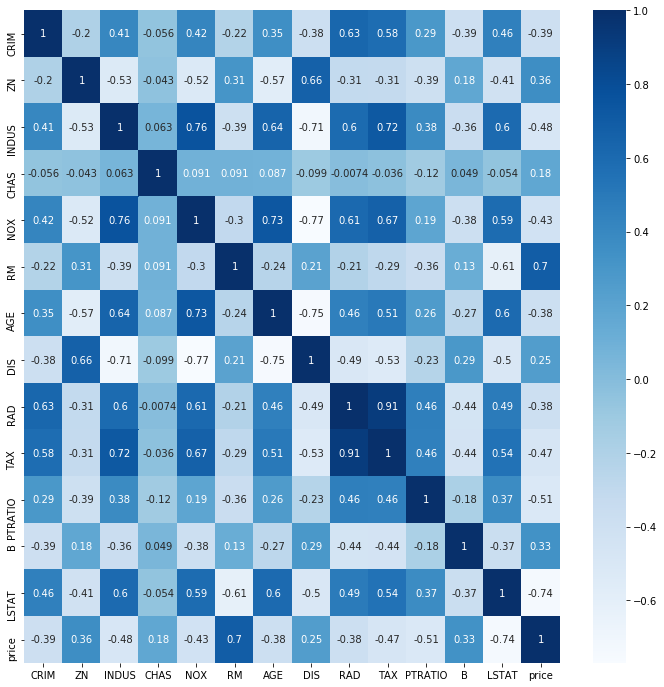

In [68]:
import seaborn as sns

#상관관계 분석
plt.figure(figsize = (12,12))
sns.heatmap(df_boston.corr(), annot = True, cmap='Blues')    
#(연속형데이터(숫자로 표현된 값)만 가능)상관계수 계산해주는 corr()
#각 셀의 값을 표시할지 결정하는 annot(==annotation)
plt.show()

In [54]:
df_boston.shape #전체데이터의 구조(크기)

(506, 14)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, random_state = 0)

Ir_model_boston = LinearRegression()
Ir_model_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 모델 평가

In [56]:
from sklearn.metrics import mean_squared_error

pred_train = Ir_model_boston.predict(X_train)
pred_test  = Ir_model_boston.predict(X_test)

print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

19.640519427908043
29.78224509230237


### 보스턴 주택가격 특성 확장하기

In [57]:
col = dfX.columns

for i in range(col.size):
    for j in range(i, col.size):
        dfX[col[i]+'x'+col[j]] = dfX[col[i]]*dfX[col[j]]

In [58]:
dfX.shape

(506, 104)

In [59]:
dfX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [60]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, random_state = 0)

In [61]:
Ir_model_boston = LinearRegression()
Ir_model_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
from sklearn.metrics import mean_squared_error

pred_train = Ir_model_boston.predict(X_train)
pred_test  = Ir_model_boston.predict(X_test)

print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

4.090362612543782
32.069135121012884


==> 과대적합이 심해졌다

### Ridge 모델 적용하기

In [63]:
from sklearn.linear_model import Ridge, Lasso 

In [71]:
ridge_boston = Ridge(alpha=10).fit(X_train, y_train) #훈련시키기

#스코어 출력해보자
pred_train = ridge_boston.predict(X_train)   
pred_test  = ridge_boston.predict(X_test)

print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

4.982513479011909
23.204339526795682


### Lasso 모델 적용하기

In [73]:
lasso_boston = Lasso(alpha = 10). fit(X_train, y_train)

print('사용한 특성의 수 : {}'.format(np.sum(lasso_boston.coef_!=0)) )

pred_train = lasso_boston.predict(X_train)   
pred_test  = lasso_boston.predict(X_test)

print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

사용한 특성의 수 : 30
9.905795924606986
23.146155764026


C:\Users\SMT078\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2227.2543010480877, tolerance: 3.233182126649077
  positive)


### R2 스코어 구하기

In [74]:
print(lasso_boston.score(X_train, y_train))
print(lasso_boston.score(X_test, y_test))

0.8838823020676209
0.7166899057482219


### 최적의 규제값(alpha) 찾기

C:\Users\SMT078\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.8524830175409, tolerance: 3.233182126649077
  positive)
C:\Users\SMT078\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1044.1440984658825, tolerance: 3.233182126649077
  positive)
C:\Users\SMT078\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.6918383506793, tolerance: 3.233182126649077
  positive)
C:\Users\SMT078\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

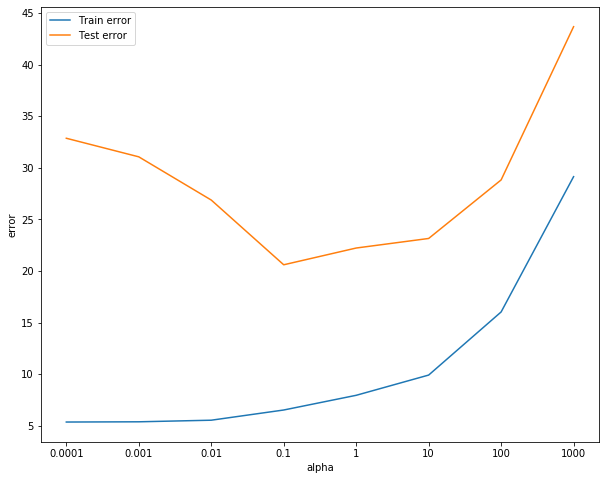

In [75]:
import matplotlib.pyplot as plt

train_error = []
test_error = []

alpha_list = ['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000']

for i in alpha_list:
    #라쏘 모델 생성 및 알파값 설정 후 훈련시키기
    lasso_model = Lasso(alpha = float(i)).fit(X_train, y_train)  
    #훈련데이터셋 평가
    pred = lasso_model.predict(X_train)
    #훈련 결과를 이용해서 평균제곱오차를 구한 후 리스트에 추가   ##예측했던 값 누적
    train_error.append(mean_squared_error(pred, y_train))   
    
    pred = lasso_model.predict(X_test)
    test_error.append(mean_squared_error(pred, y_test))
    
plt.figure(figsize=(10,8))
plt.plot(alpha_list, train_error, label = 'Train error')
plt.plot(alpha_list, test_error, label = 'Test error')
plt.legend() #범례설정
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

### Scaling

In [76]:
from sklearn.datasets import load_breast_cancer

In [83]:
cancer = load_breast_cancer()

#훈련, 정답 데이터 분리해서 넣어줌
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state = 1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))

0.9460093896713615
0.9230769230769231


In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandarScaler를 적용하여 학습을 수행한다.
# ==> 변수의 평균이 1, 표준편차가 1인 데이터가 되도록 변환을 수행
# 표준화된 값 = (x-평균) / 표준 편차
scaler_st = StandardScaler().fit(X_train) 
X_train_scale = scaler_st.transform(X_train)  #훈련 데이터의 StandardScaler 변환 수행(파이프 라인)
X_test_scale = scaler_st.transform(X_test)    #테스트 데이터의 StandardScaler 변환 수행(파이프 라인)

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scale, y_train)  #최근접 이웃 알고리즘을 통한 훈련
print(knn_model.score(X_train_scale, y_train))
print(knn_model.score(X_test_scale, y_test))

0.9835680751173709
0.958041958041958


In [87]:
# MinMaxScaler를 적용하여 학습을 수행한다.
# ==> 최소값은 0, 최대값은 1
# ※이상치 데이터의 영향을 심하게 받는 문제가 있다
# 표준화된 값 = (x-최솟값) / (최대값-최솟값)
scaler_st = MinMaxScaler().fit(X_train)
X_train_scale = scaler_st.transform(X_train)
X_test_scale = scaler_st.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scale, y_train)
print(knn_model.score(X_train_scale, y_train))
print(knn_model.score(X_test_scale, y_test))

0.9835680751173709
0.9370629370629371


In [88]:
# RobustScaler를 적용하여 학습을 수행한다.
# ==> 중앙값을 구해서 중앙값을 0으로 놓고, 데이터 전체 구간을 4등분 하여
# ===> 1/4 지점을 -1, 3/4 지점을 1로 변환을 한다.
# *이상치 데이터를 1과 -1 이외의 지역으로 보내는 효과를 얻을 수 있다.
# 표준화된 값 = (x-중간값) / (3사분위값-1사분위값)
scaler_st = RobustScaler().fit(X_train)
X_train_scale = scaler_st.transform(X_train)
X_test_scale = scaler_st.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scale, y_train)
print(knn_model.score(X_train_scale, y_train))
print(knn_model.score(X_test_scale, y_test))

0.9812206572769953
0.951048951048951
